In [1]:
import pandas as pd 
import numpy as np 
import os 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro,kurtosis,boxcox, ttest_ind

In [2]:
# pre-defined functions for statistical analysis 
def check_normality(series):
    """
    Checks if given sample is normally distributed using Shapiro-Wilk Test.
    """
    stat, p_value = shapiro(series)
    kurtosis_val = kurtosis(series)

    # print kurtosis value 
    print(f"Kurtosis Value : {kurtosis_val}")
    
    # print skew 
    print(f"Distribution Skew: {series.skew()}")

    # print results of shapiro test 
    alpha = 0.05
    if p_value > alpha:
        print("Shapiro-Wilk Test: The data appears to be normally distributed")
    else:
        print("Shapiro-Wilk Test: The data does not appear to be normally distributed ")
    

def boxcox(series):
    normal_series, lambda_val = boxcox(series)
    return normal_series

In [3]:
# read the input file
# source :https://www.kaggle.com/datasets/cityofLA/city-payroll-data
infile = r'/Users/akhilmathur/Desktop/python_files/datasets/hypo_testing.csv'
df = pd.read_csv(infile, low_memory = False)

In [4]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [5]:
# list of columns and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department Title              285008 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 285008 non-null  object 
 5   Job Class Title               285008 non-null  object 
 6   Employment Type               285008 non-null  object 
 7   Hourly or Event Rate          263987 non-null  object 
 8   Projected Annual Salary       285008 non-null  object 
 9   Q1 Payments                   285008 non-null  object 
 10  Q2 Payments                   285008 non-null  object 
 11  Q3 Payments                   285008 non-null  object 
 12  Q4 Payments                   285008 non-nul

In [6]:
# cleanup the numerical columns - remove $ symbol to convert to float

for column in df.select_dtypes(include = 'object'):
    df[column] = df[column].astype(str)
    df[column] = df[column].apply(lambda x: x.replace('$',''))
    # convert the numerical columns to float type 
    try:
        df[column] = df[column].astype(float)
    except:
        pass

In [7]:
df.describe().round(2).iloc[:,1:]

,Year,Payroll Department,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,Total Payments,...,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),FMS Department,Job Class,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost
count,285008.00,231463.00,263987.00,285008.00,285008.00,285008.00,285008.00,285008.00,285008.00,285008.00,...,242744.00,284574.00,285008.00,285008.00,285008.00,285008.00,285008.00,285008.00,285008.00,285008.00
mean,2014.79,4557.47,38.89,79988.91,21169.16,16965.39,12309.95,12570.13,11374.69,63014.63,...,731.21,6387.45,1752.45,4983.18,66.27,3051.04,10628.56,613.35,49.08,11291.00
std,1.16,2508.76,32.92,33464.23,14131.04,14912.21,14431.23,14795.70,19093.27,48666.57,...,4792.18,14670.31,6099.73,8719.63,29.30,2038.69,5314.28,421.91,77.37,5708.02
min,2013.00,101.00,0.00,0.00,-2254.58,-12607.85,-34122.58,-30728.27,-30878.27,-30728.27,...,-102.70,-1019.49,-30878.27,-30878.27,2.00,1.00,0.00,0.00,0.00,0.00
25%,2014.00,3001.00,26.48,56732.53,12371.98,192.47,0.00,0.00,648.79,22930.75,...,0.00,0.00,0.00,389.03,42.00,1960.00,10710.24,405.24,0.00,11126.88
50%,2015.00,4301.00,37.31,78945.04,21356.78,17684.22,4469.46,3992.80,4388.48,54959.08,...,0.00,331.08,0.00,2418.44,70.00,2234.00,11470.34,412.34,11.40,11894.13
75%,2016.00,7031.00,47.63,99813.71,28903.09,27031.41,23324.54,24157.20,13216.70,95981.92,...,0.00,5860.48,717.73,6145.22,88.00,3580.00,13025.04,898.08,11.45,14073.96
max,2016.00,8702.00,900.00,360743.76,262966.09,191435.35,291317.36,500930.74,435621.77,500930.74,...,174325.29,311315.62,428128.98,435621.77,98.00,9998.00,18144.43,1282.61,193.32,19392.62


In [8]:
df_grpd = df.groupby(['Department Title'])['Base Pay'].agg(['mean', 'count']).sort_values(by = ['count'], ascending = False)
df_grpd.astype(int).head()

,mean,count
Department Title,,
Police (LAPD),64594,66057
Water And Power (DWP),60195,53545
Recreation And Parks,14931,35344
Fire (LAFD),68173,18134
Airports (LAWA),50131,18060


#### Setup Hypothesis

**Null Hypothesis (H0)**: There is ***no*** significant difference in the mean base pay of Animal Services and Zoo

**Alternate Hypothesis (Ha)**: There ***is*** significant difference in the mean base pay of Fire (LAFD) and Animal Services and Zoo

### Check Assumptions for Parametric Analysis

In [9]:
# Check for Parametric Assumption - is data normally distributed?

grp1_var = 'Animal Services'
grp2_var = 'Zoo'

df_anmls = df[df['Department Title'] == grp1_var]
df_zoo = df[df['Department Title'] == grp2_var]

grp1, grp2 = df_anmls['Base Pay'], df_zoo['Base Pay']

In [10]:
# compare variance of both distributions 
var_anmls, var_zoo = grp1.var(), grp2.var()

if var_anmls > var_zoo:
    var_ratio = var_anmls/var_zoo
else:
    var_ratio = var_zoo/var_anmls

# a ratio of <= 4 is generally acceptable for using parametric method 
print("Ratio of variance for the two samples :{}".format(var_ratio))

Ratio of variance for the two samples :1.3809615514620714


Kurtosis Value : 5.420540018335229
Distribution Skew: 1.2878192821675507
Shapiro-Wilk Test: The data does not appear to be normally distributed 


/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


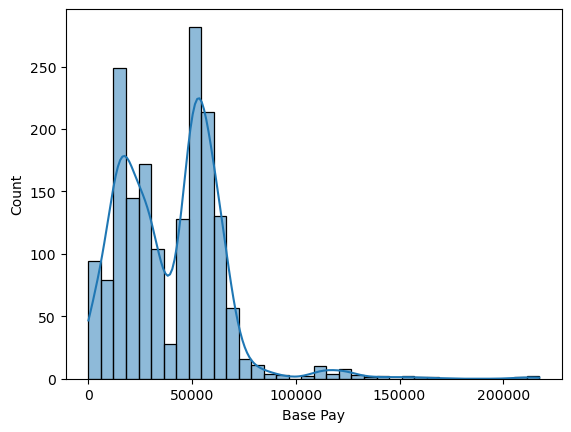

In [11]:
sns.histplot( x = grp1, kde = True)
check_normality(grp1)

Kurtosis Value : 0.42853424594043865
Distribution Skew: -0.16250499866331464
Shapiro-Wilk Test: The data does not appear to be normally distributed 


/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Base Pay', ylabel='Count'>

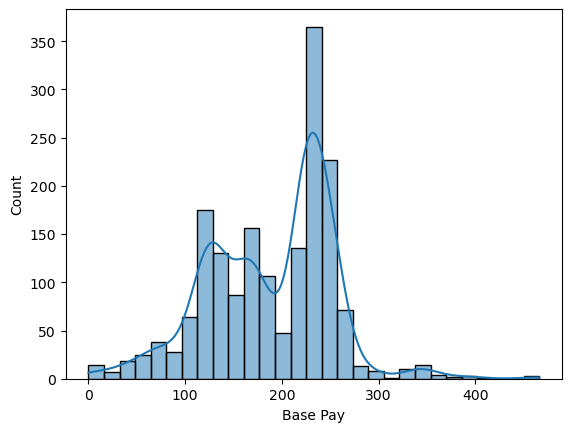

In [12]:
# perform transformation for normality 
grp1 = np.sqrt(grp1)
check_normality(grp1)
sns.histplot( x = grp1, kde = True)

Kurtosis Value : 4.44474641596136
Distribution Skew: 1.4825859334953682
Shapiro-Wilk Test: The data does not appear to be normally distributed 


/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


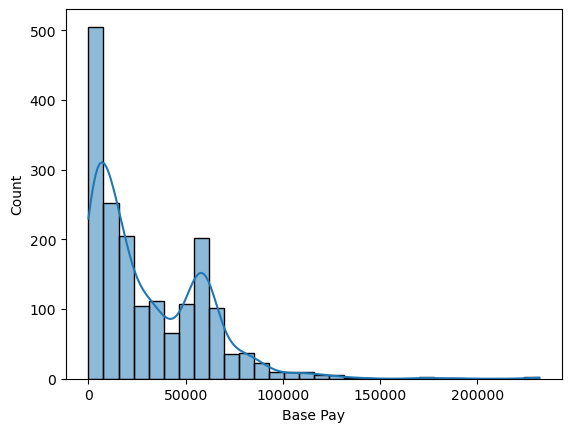

In [13]:
sns.histplot(x = grp2, kde = True)
check_normality(grp2)

Kurtosis Value : -0.6104135228163718
Distribution Skew: 0.25980608208328587
Shapiro-Wilk Test: The data does not appear to be normally distributed 


/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Base Pay', ylabel='Count'>

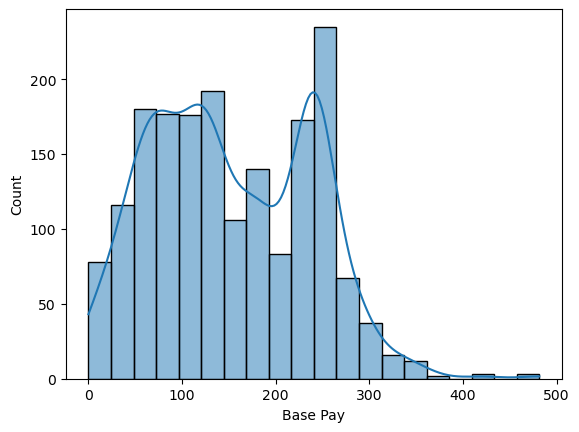

In [14]:
# perform transformation for normality 
grp2 = np.sqrt(grp2)
check_normality(grp2)
sns.histplot( x = grp2, kde = True)

In [24]:
# perform independent t-test for the above samples 
stat,p_value = ttest_ind(grp1, grp2)

# set significance level - to compare with calculated p-value
alpha = 0.05 

# degrees of freedom 
df = len(grp1) + len(grp2)- 2 

#critical value (generally obtained from t-dist table) 
critical_val = t.ppf(1 - alpha / 2, df)

print("===============\n")

print("Statistical Analysis Summary: \n")
print("Test Statistic: {}, p-value: {}".format(stat.round(3),p_value))
print("Degrees of Freedom (df):", df)
print("Significance Level (alpha) :", alpha)
print("Critical Value:", critical_val)
print("\n")

# compare p-value and alpha to reject or accept H0 
if p_value < alpha:
    print("Null Hypothesis (H0) Rejected: The difference between base pay in Animals and Zoo Department is statistically significant!")
else:
    print("Failed to Rejct Null Hypothesis (H0) : The difference between base pay in Animals and Zoo Department is NOT statistically significant!")         

print("===============\n")
# alternative: manual approach to calculate test statistic 
num = (grp1.mean() - grp2.mean())
den = np.sqrt(grp1.var()/len(grp1)  + grp2.var()/len(grp2))
test_stat = num/den

print("Test Statistic using Manual Calculation: ", test_stat)
print("Critical Value with given df and alpha value from t-distribution table is 1.960")
print("Since the test statistic is greater than critical value, we reject the Null Hypothesis")


Statistical Analysis Summary: 

Test Statistic: 13.987, p-value: 2.5963642324716207e-43
Degrees of Freedom (df): 3547
Significance Level (alpha) : 0.05
Critical Value: 1.9606330195487862


Null Hypothesis (H0) Rejected: The difference between base pay in Animals and Zoo Department is statistically significant!

Test Statistic using Manual Calculation:  14.031147140622869
Critical Value with given df and alpha value from t-distribution table is 1.960
Since the test statistic is greater than critical value, we reject the Null Hypothesis
